## Statistics and Linear Algebra refresh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

### Mean and covariance
 
If $X$ and $Y$ represent two sets of random samples from a dataset then the mean and convariance are defined as follows.  
The [mean](https://en.wikipedia.org/wiki/Mean) $\mu_X$ is the [expected value](https://en.wikipedia.org/wiki/Expected_value) over all samples $X$.

$$\mu_X = \mathbb{E}[X]$$

The [covariance](https://en.wikipedia.org/wiki/Covariance) measures how dependend two random variables are and how they change together. This covariance between sets of samples is defined as:

$$C(X,Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)^T] = \Sigma_{X,Y} $$

And the covariance of a set of samples with itself is defined by $C(X,X) = \Sigma_{X}$.

### Multivariate Guassian

The [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (normal) distribution is a multidimensional generalisation of the one-dimensional [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).

The standard normal distribution has a [density](https://en.wikipedia.org/wiki/Probability_density_function) defined as:

$$ p(x) = (2\pi\sigma^2)^{-1/2} e^{\textstyle \left( -\frac{1}{2\sigma^2}(x - \mu)^2\right)} $$

With mean $\mu$ and [variance](https://en.wikipedia.org/wiki/Variance) $\sigma^2$.  
The multivariate Gaussian has a [joint probability](https://en.wikipedia.org/wiki/Joint_probability_distribution) density given by:

$$ p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = (2\pi)^{-D/2} \lvert\Sigma\rvert^{-1/2} e^{\textstyle \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)} $$

Where $\mathbf{\mu}$ is the mean vector (of length $D$) and $\Sigma$ is the (symmetric, positive
definite) covariance matrix (of size $D \times D$) with $\lvert\Sigma\rvert$ the [determinant](https://en.wikipedia.org/wiki/Determinant). $D$ is the dimension of the samples. As a shorthand we write:

$$\mathbf{x} \sim \mathcal{N}(\mathbf{\mu}, \Sigma)$$

An example of both the univarite and bivariate Guassian distribution are plotted below. The figure on the left is a univariate distrubution with mean $\mu=0$ and variance $\sigma^2 = 1$. The figure on the right is a bivariate distribution with mean $\mathbf{\mu} = [0, 1]$ and covariance with $C(x_1,x_1) = C(x_2,x_2) = 1$ and $C(x_1,x_2) = C(x_2,x_1) = 0.75$. Note that because the covariance between $x_1$ and $x_2$ is not 0 that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase.

In [30]:
def univariate_gaussian(x, mean, variance):
    return np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean)**2 / (2 * variance))

def multivariate_gaussian(x, D, mean, covariance):
    x_m = x - mean
    return np.sqrt((2 * np.pi)**D * np.linalg.det(covariance)) * np.exp(-(np.linalg.solve(covariance, x_m).dot(x_m))/2)

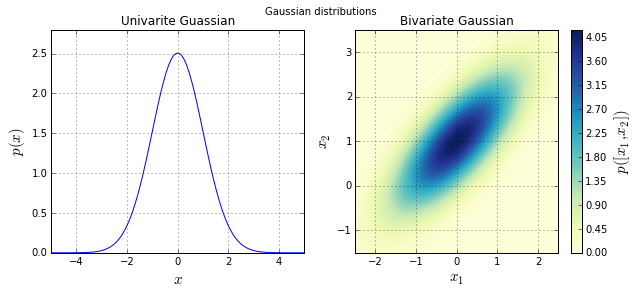

In [31]:
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot univariate distribuition
univariate_mean = 0  # Mean
univariate_variance = 1  # Variance
x = np.linspace(-5, 5, num=100)
y = univariate_gaussian(x, univariate_mean, univariate_variance)
# Plot univariate distribution
ax1.plot(x, y, 'b-')
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$p(x)$', fontsize=15)
ax1.axis([-5, 5, 0, 2.8])
ax1.set_title('Univarite Guassian')
ax1.grid()

# Plot bivariate distribution
D = 2  # Number of dimensions
bivariate_mean = np.array([0, 1])  # Mean 
bivariate_covariance = np.matrix([[1, 0.75], [0.75, 1]])  # Covariance
# Generate surface to plot
nb_of_x = 200 # compute the cost nb_of_ws times in each dimension
x1s = np.linspace(-5, 5, num=nb_of_x) # hidden weights
x2s = np.linspace(-5, 5, num=nb_of_x) # output weights
x1, x2 = np.meshgrid(x1s, x2s) # generate grid
p = np.zeros((nb_of_x, nb_of_x)) # initialize cost matrix
# Fill the cost matrix for each combination of weights
for i in range(nb_of_x):
    for j in range(nb_of_x):
        p[i,j] = multivariate_gaussian(np.array([x1[i,j], x2[i,j]]), D, bivariate_mean, bivariate_covariance)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=15)
ax2.set_ylabel('$x_2$', fontsize=15)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_title('Bivariate Gaussian')
ax2.grid()
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$p([x_1, x_2])$', fontsize=15)
plt.suptitle('Gaussian distributions')
plt.show()

#### Mean and Variance of affine transformations of the multivariate Gaussian
 
An [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of a [multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Affine_transformation) will result into a new Gaussian distribution.  
If $X$ is Gaussian distributed and $Y = LX + u$ with $L$ a [linear transformation](https://en.wikipedia.org/wiki/Linear_map) and $u$ a vector then $Y$ is also Guassian distributed with mean $\mu_{Y} = u + L\mu_{X}$ and covariance matrix $\Sigma_{Y} = L\Sigma_{X}L^T$.

$$L \sim \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^T)$$

This can be proven als follows:

$$\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[LX + u] = \mathbb{E}[LX] + u = L\mu_{X} + u$$

$$\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^T] \\
           & = \mathbb{E}[(LX+u - L\mu_{X}-u)(LX+u - L\mu_{X}-u)^T] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^T] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^TL^T] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^T]L^T \\
           & = L\Sigma_{X}L^T
\end{split}$$

#### Sampling from a multivariate Gaussian

The previous result helps us in [sampling from a multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).

TODO

### Block matrix inverse

Let invertable $n \times n$ matrix $A$ and inverse $A^{-1}$ be partitioned into:

$$A = \left[\begin{array}{cc}
P & Q \\
R & S
\end{array}\right], \quad
A^{-1} = \left[\begin{array}{cc}
\tilde{P} & \tilde{Q} \\
\tilde{R} & \tilde{S}
\end{array}\right]
$$

where $P$ and $\tilde{P}$ are $n_1 \times n_1$ matrices and $S$ and $\tilde{S}$ are $n_2 \times n_2$ matrices with $n = n_1 + n_2$. The submatrices of $A^{−1} can then be defined as:

$$\begin{split}
\tilde{P} & = P^{-1} + P^{-1}QMRP^{-1} \\
\tilde{Q} &= -P^{-1}QM \\
\tilde{R} &= -MRP^{-1} \\
\tilde{S} &= M
\end{split}$$
With $M = (S - RP^{-1} Q)^{-1}$

### Joint Gaussian
 
$x$ and $y$ are jointly Gaussian random vectors:
$$
\left[\begin{array}{c} x \\ y \end{array}\right]
\sim
\mathcal{N}\left(
\left[\begin{array}{c} \mu_x \\ \mu_y \end{array}\right],
\left[\begin{array}{cc}
A & C \\
C^T & B
\end{array}\right]
\right) = 
\mathcal{N}\left(
\left[\begin{array}{c} \mu_x \\ \mu_y \end{array}\right],
\left[\begin{array}{cc}
\tilde{A} & \tilde{C} \\
\tilde{C}^T & \tilde{B}
\end{array}\right]^{-1}
\right)
$$

Then the conditional distribution of $x$ given $y$ is:
$$p(x \mid y) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y})$$

With:
$$\begin{split}
\mu_{x|y} & = \mu_x + CB^{-1}(y-\mu_y) \\
          & = \mu_x - \tilde{A}^{-1}\tilde{C}(y-\mu_y) \\
\Sigma_{x|y} & = A - CB^{-1}C^\top \\
             & = \tilde{A}^{-1}
\end{split}$$

### Multivariate Gaussian Theorem

Suppose $\mathbf{x} = (\mathbf{x}_1, \mathbf{x}_2)$ is jointly Gaussian with:

$$
\mu = \left[\begin{array}{c} \mu_1 \\ \mu_2 \end{array}\right], \quad
\Sigma = \left[\begin{array}{cc}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{21} & \Sigma_{22}
\end{array}\right], \quad
\Lambda = \Sigma^{-1} = \left[\begin{array}{cc}
\Lambda_{11} & \Lambda_{12} \\
\Lambda_{21} & \Lambda_{22}
\end{array}\right]
$$

Then the marginals are given by:
$$p(\mathbf{x}_1) = \mathcal{N}(\mu_1,\Sigma_{11})$$
$$p(\mathbf{x}_2) = \mathcal{N}(\mu_2,\Sigma_{22})$$

The posterior conditional is given by:
$$p(\mathbf{x}_1 \mid \mathbf{x}_2) = \mathcal{N}(\mu_{1|2},\Sigma_{1|2})$$
With:
$$\begin{split}
\mu_{1|2} & = \mu_1 + \Sigma_{12}\Sigma_{22}^{-1}(x_2 - \mu_2) \\
          & = \mu_1 - \Lambda_{11}^{-1}\Lambda_{12}(x_2 - \mu_2) \\
          & = \Sigma_{1|2}(\Lambda_{11}\mu_1 - \Lambda_{12}(x_2 - \mu_2)) \\
\Sigma_{1|2} & = \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21} = \Lambda_{11}^{-1}
\end{split}$$